## Tensorflow and keras

No hay que tomar esto muy en serio, porque es medio "introductorio". Así que el código de abajo no está hecho de la manera en que comúnmente se haría y puede causar confusiones.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import tensorflow as tf
from tensorflow import keras
# Keras function for loading images
from tensorflow.keras.preprocessing.image import load_img

In [2]:
# para colab
!git clone https://github.com/alexeygrigorev/clothing-dataset-small.git

Cloning into 'clothing-dataset-small'...
remote: Enumerating objects: 3839, done.
remote: Counting objects: 100% (400/400), done.
remote: Compressing objects: 100% (400/400), done.
remote: Total 3839 (delta 9), reused 385 (delta 0), pack-reused 3439 (from 1)
Receiving objects: 100% (3839/3839), 100.58 MiB | 16.23 MiB/s, done.
Resolving deltas: 100% (10/10), done.


In [3]:
path = '/content/clothing-dataset-small/train/t-shirt'
name = '5f0a3fa0-6a3d-4b68-b213-72766a643de7.jpg'
fullname = f'{path}/{name}'
img = load_img(fullname, target_size=(299, 299))

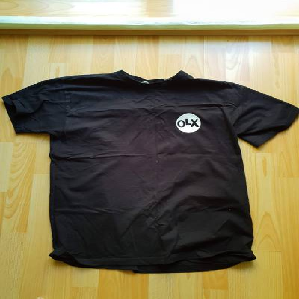

In [4]:
img

In [5]:
print(img)

<PIL.Image.Image image mode=RGB size=299x299 at 0x7CFF99C8E090>


array([[[179, 171,  99],
        [179, 171,  99],
        [181, 173, 101],
        ...,
        [251, 253, 248],
        [251, 253, 248],
        [251, 254, 247]],

       [[188, 179, 112],
        [187, 178, 111],
        [186, 177, 108],
        ...,
        [251, 252, 247],
        [251, 252, 247],
        [251, 252, 246]],

       [[199, 189, 127],
        [200, 190, 128],
        [200, 191, 126],
        ...,
        [250, 251, 245],
        [250, 251, 245],
        [250, 251, 245]],

       ...,

       [[165, 151,  76],
        [173, 159,  84],
        [171, 157,  82],
        ...,
        [183, 135,  25],
        [181, 133,  22],
        [183, 135,  24]],

       [[165, 151,  76],
        [173, 159,  84],
        [171, 157,  82],
        ...,
        [182, 134,  23],
        [180, 132,  21],
        [182, 134,  23]],

       [[165, 151,  76],
        [173, 159,  84],
        [171, 157,  82],
        ...,
        [181, 133,  22],
        [179, 131,  20],
        [182, 134,  23]]], dtype=uint8)
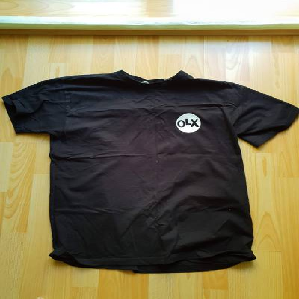

In [6]:
x = np.array(img)
x

In [7]:
x.shape

(299, 299, 3)

## Pre-trained convultional nn

In [8]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions

In [9]:
# `weights = "imagenet"` means we want to use pre-trained network that was trained on imagenet

model = Xception(
    weights="imagenet",
    input_shape=(299, 299, 3)
)

91884032/91884032 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [10]:
# esto es igual que expandir dimensiones
X = np.array([x])
X.shape

(1, 299, 299, 3)

In [11]:
# Esto es como el dividir por 255, es para normalizar los datos, una función que viene con keras y xception, pero pues como tal no divide en 255, hace otro tipo de normalización creo que de -1 a 1
X = preprocess_input(X)
X[0]

array([[[ 0.4039216 ,  0.3411765 , -0.2235294 ],
        [ 0.4039216 ,  0.3411765 , -0.2235294 ],
        [ 0.41960788,  0.35686278, -0.20784312],
        ...,
        [ 0.96862745,  0.9843137 ,  0.94509804],
        [ 0.96862745,  0.9843137 ,  0.94509804],
        [ 0.96862745,  0.99215686,  0.9372549 ]],

       [[ 0.47450984,  0.4039216 , -0.12156862],
        [ 0.4666667 ,  0.39607847, -0.12941176],
        [ 0.45882356,  0.38823533, -0.15294117],
        ...,
        [ 0.96862745,  0.9764706 ,  0.9372549 ],
        [ 0.96862745,  0.9764706 ,  0.9372549 ],
        [ 0.96862745,  0.9764706 ,  0.92941177]],

       [[ 0.56078434,  0.48235297, -0.00392157],
        [ 0.5686275 ,  0.4901961 ,  0.00392163],
        [ 0.5686275 ,  0.49803925, -0.01176471],
        ...,
        [ 0.9607843 ,  0.96862745,  0.92156863],
        [ 0.9607843 ,  0.96862745,  0.92156863],
        [ 0.9607843 ,  0.96862745,  0.92156863]],

       ...,

       [[ 0.2941177 ,  0.18431377, -0.40392154],
        [ 0

In [12]:
pred = model.predict(X)
pred.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


(1, 1000)

In [13]:
decode_predictions(pred)

35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step


[[('n03595614', 'jersey', 0.68196356),
  ('n02916936', 'bulletproof_vest', 0.038139977),
  ('n04370456', 'sweatshirt', 0.034324735),
  ('n03710637', 'maillot', 0.011354207),
  ('n04525038', 'velvet', 0.0018453562)]]

Al parecer, ImageNet no es bueno en clothes detection, igual era un ejemplo muy muy básico

## Transfer Learning

Acá si comienza el "código"

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Si no tuviera el preprocess_input (se usa este porque estamos usando xception, y es el preprocesador que usa xception) una opción puede ser usar el escalador normal, por ejemplo, train_gen = ImageDataGenerator(rescale=1./255), claramente si tengo una función personalizada se puede usar.

# también es posible añadir augmentación como rotación, tamaños, etc.
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_ds = train_gen.flow_from_directory(
    '/content/clothing-dataset-small/train',
    target_size=(150,150),
    batch_size=32,
)

Found 3068 images belonging to 10 classes.


In [15]:
# Es necesario usar next(), normalmente no tiene los valores directamente, hay que iterarlo, pero esto se hace para mirar o sacar datos, como tal para entrenar no, keras itera al entrenar.
next(train_ds)

(array([[[[-0.8117647 , -0.92941177, -0.96862745],
          [-0.8117647 , -0.92941177, -0.96862745],
          [-0.8117647 , -0.92941177, -0.96862745],
          ...,
          [-0.31764704, -0.6784314 , -0.85882354],
          [-0.31764704, -0.6784314 , -0.85882354],
          [-0.31764704, -0.6784314 , -0.85882354]],
 
         [[-0.8117647 , -0.92941177, -0.96862745],
          [-0.8117647 , -0.92941177, -0.96862745],
          [-0.8117647 , -0.92941177, -0.96862745],
          ...,
          [-0.35686272, -0.7176471 , -0.8980392 ],
          [-0.35686272, -0.7176471 , -0.8980392 ],
          [-0.35686272, -0.7176471 , -0.8980392 ]],
 
         [[-0.81960785, -0.9372549 , -0.9764706 ],
          [-0.79607844, -0.9137255 , -0.9529412 ],
          [-0.78039217, -0.8980392 , -0.9372549 ],
          ...,
          [-0.32549018, -0.6862745 , -0.8666667 ],
          [-0.3098039 , -0.67058825, -0.8509804 ],
          [-0.31764704, -0.6784314 , -0.85882354]],
 
         ...,
 
         [[ 

In [16]:
# El indice que le asignó a las clases (subcarpetas)
train_ds.class_indices

{'dress': 0,
 'hat': 1,
 'longsleeve': 2,
 'outwear': 3,
 'pants': 4,
 'shirt': 5,
 'shoes': 6,
 'shorts': 7,
 'skirt': 8,
 't-shirt': 9}

In [17]:
X, y = next(train_ds)

In [18]:
X.shape

(32, 150, 150, 3)

In [19]:
y[:5]

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

In [20]:
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

# flow_from_directory me carga imagenes directamente desde una estructura de directorios, el shuffle false se suele usar en validación o evaluación, al validar si necesito los datos ordenados.
val_ds = val_gen.flow_from_directory(
    '/content/clothing-dataset-small/validation',
    target_size=(150, 150),
    batch_size=32,
    shuffle=False
)

Found 341 images belonging to 10 classes.


In [21]:
# El include_top, en false me excluye las capas densas finales
# esto es usado cuando quieres usar el modelo para tu propio problema específico con tus propias etiquetas, en términos, deja solo las capas convolucionales, conviertiendolo en un extractor de caracteristicas.
base_model = Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(150, 150, 3)
)

# congela los pesos del modelo base, esto es para que cuando entrenemos no se vuelva a entrenar los pesos del modelo base, porque es un modelo ya entrenado, no es necesario entrenarlo otra vez
base_model.trainable = False

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [22]:
# acá entre comillas ya está creando el modelo, solo que hacer así es como raro, cada capa se agrega a la otra por eso la estructura es "capa = capa(capa_anterior)"
inputs = keras.Input(shape=(150, 150, 3))
base = base_model(inputs)
vectors = keras.layers.GlobalAveragePooling2D()(base)
outputs = keras.layers.Dense(10)(vectors)
model = keras.Model(inputs, outputs)

preds = model.predict(X)
preds.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step


(32, 10)

In [23]:
preds[0]

array([-1.7909124 ,  1.9180636 ,  0.65941113,  0.26202017,  0.60892045,
       -1.3652067 ,  0.41684014, -0.6636342 ,  0.26842076, -0.49470142],
      dtype=float32)

In [24]:
learning_rate = 0.01
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

# El logits en true se usa cuando no tenemos una función de activación (none o linear) en un problema de clasificación, entonces hay que normalizar los logits, al parecer es más preciso y robusto hacerlo con logits en lugar de activarlo con alguna función de activación de clasificación (softmax o sigmoide).
loss = keras.losses.CategoricalCrossentropy(from_logits=True)

model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])


In [25]:
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


96/96 ━━━━━━━━━━━━━━━━━━━━ 25s 203ms/step - accuracy: 0.5579 - loss: 1.9188 - val_accuracy: 0.7537 - val_loss: 0.9022
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 81ms/step - accuracy: 0.8032 - loss: 0.5921 - val_accuracy: 0.7830 - val_loss: 0.8399
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 89ms/step - accuracy: 0.8846 - loss: 0.3430 - val_accuracy: 0.8152 - val_loss: 0.8424
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 85ms/step - accuracy: 0.9259 - loss: 0.2034 - val_accuracy: 0.7713 - val_loss: 0.9169
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 81ms/step - accuracy: 0.9524 - loss: 0.1470 - val_accuracy: 0.8182 - val_loss: 0.8000
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 95ms/step - accuracy: 0.9625 - loss: 0.1125 - val_accuracy: 0.8182 - val_loss: 0.8540
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 83ms/step - accuracy: 0.9766 - loss: 0.0732 - val_accuracy: 0.7947 - val_loss: 0.9527
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 79ms/step - accuracy: 0.9909 - loss: 0.0438 - val_accuracy: 0.7947 - val_loss:

In [26]:
history.history['accuracy']
# history.history['val_accuracy']

[0.6577575206756592,
 0.8070403933525085,
 0.8842894434928894,
 0.9256845116615295,
 0.9419817328453064,
 0.9674054980278015,
 0.9788135886192322,
 0.9898957014083862,
 0.9938070178031921,
 0.9967405200004578]

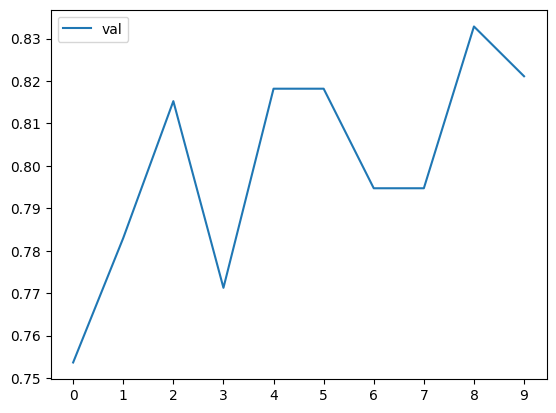

In [27]:
# plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.xticks(np.arange(10))
plt.legend()

## Adjusting the learning rate

In [28]:
def make_model(learning_rate=0.01):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )
    base_model.trainable = False

    #################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    v = keras.layers.GlobalAveragePooling2D()(base)
    outputs = keras.layers.Dense(10)(v)
    model = keras.Model(inputs, outputs)

    #################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )

    return model

In [29]:
scores = {}

for lr in [0.001, 0.01]:
    print(lr)

    model = make_model(learning_rate=lr)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[lr] = model.history

    print()
    print()

0.001
Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 20s 148ms/step - accuracy: 0.4933 - loss: 1.4931 - val_accuracy: 0.7830 - val_loss: 0.7059
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 12s 83ms/step - accuracy: 0.7865 - loss: 0.6413 - val_accuracy: 0.7859 - val_loss: 0.6352
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 88ms/step - accuracy: 0.8216 - loss: 0.5152 - val_accuracy: 0.8182 - val_loss: 0.5828
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 85ms/step - accuracy: 0.8723 - loss: 0.4246 - val_accuracy: 0.7947 - val_loss: 0.5687
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 81ms/step - accuracy: 0.8859 - loss: 0.3572 - val_accuracy: 0.8152 - val_loss: 0.5663
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 89ms/step - accuracy: 0.9134 - loss: 0.3180 - val_accuracy: 0.8299 - val_loss: 0.5430
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 87ms/step - accuracy: 0.9251 - loss: 0.2875 - val_accuracy: 0.8240 - val_loss: 0.5292
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 84ms/step - accuracy: 0.9299 - loss: 0.2628 - val_accuracy: 0

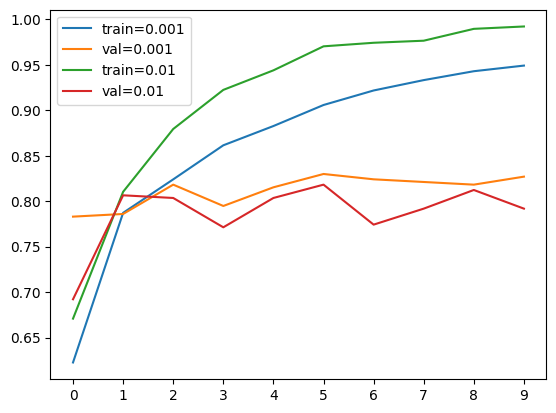

In [30]:
for lr, hist in scores.items():
    plt.plot(hist.history['accuracy'], label=('train=%s' % lr))
    plt.plot(hist.history['val_accuracy'], label=('val=%s' % lr))

plt.xticks(np.arange(10))
plt.legend()

## Training a model with callbacks

In [31]:
# solo me guarda los pesos
model.save_weights('model_v1.weights.h5')

In [32]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v1_{epoch:02d}_{val_accuracy:.3f}.keras',
    save_best_only=True,
    monitor='val_accuracy',
    # max porque accuracy funciona con valor máximo, en caso de ser pérdida/loss usarias el valor min.
    mode='max'
)

In [33]:
learning_rate = 0.001

model = make_model(learning_rate=learning_rate)

history = model.fit(
    train_ds,
    epochs=10,
    validation_data=val_ds,
    callbacks=[checkpoint]
)

Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 22s 173ms/step - accuracy: 0.5019 - loss: 1.4752 - val_accuracy: 0.7830 - val_loss: 0.7323
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 88ms/step - accuracy: 0.7848 - loss: 0.6308 - val_accuracy: 0.7889 - val_loss: 0.6417
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 102ms/step - accuracy: 0.8355 - loss: 0.5006 - val_accuracy: 0.7977 - val_loss: 0.6122
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 95ms/step - accuracy: 0.8553 - loss: 0.4494 - val_accuracy: 0.8182 - val_loss: 0.5748
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 87ms/step - accuracy: 0.8748 - loss: 0.3809 - val_accuracy: 0.8299 - val_loss: 0.5644
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 97ms/step - accuracy: 0.9020 - loss: 0.3215 - val_accuracy: 0.8328 - val_loss: 0.5438
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 92ms/step - accuracy: 0.9276 - loss: 0.2812 - val_accuracy: 0.8094 - val_loss: 0.5595
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 81ms/step - accuracy: 0.9364 - loss: 0.2564 - val_accuracy: 0.8182

## Adding more layers

In [34]:
def make_model(learning_rate=0.01, size_inner=100):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )
    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    outputs = keras.layers.Dense(10)(inner)
    model = keras.Model(inputs, outputs)

    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )

    return model

In [35]:
learning_rate = 0.001
scores = {}

for size in [10, 100, 1000]:
    print(size)

    model = make_model(learning_rate=learning_rate, size_inner=size)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[size] = history.history

    print()
    print()

10
Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 22s 156ms/step - accuracy: 0.4092 - loss: 1.8053 - val_accuracy: 0.6716 - val_loss: 1.1797
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 89ms/step - accuracy: 0.6684 - loss: 1.0363 - val_accuracy: 0.7566 - val_loss: 0.8712
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 81ms/step - accuracy: 0.7912 - loss: 0.6974 - val_accuracy: 0.7801 - val_loss: 0.7251
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 82ms/step - accuracy: 0.8116 - loss: 0.5563 - val_accuracy: 0.7713 - val_loss: 0.6873
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 87ms/step - accuracy: 0.8661 - loss: 0.4317 - val_accuracy: 0.7830 - val_loss: 0.6188
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 85ms/step - accuracy: 0.8921 - loss: 0.3681 - val_accuracy: 0.7918 - val_loss: 0.6155
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 78ms/step - accuracy: 0.9031 - loss: 0.3272 - val_accuracy: 0.7859 - val_loss: 0.6078
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 87ms/step - accuracy: 0.9221 - loss: 0.2884 - val_accuracy: 0.7

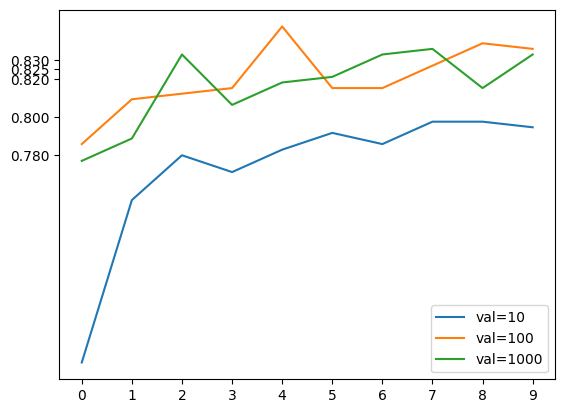

In [36]:
for size, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % size))
plt.xticks(np.arange(10))
plt.yticks([0.78, 0.80, 0.82, 0.825, 0.83])
plt.legend()

## Regularization and Dropout

In [37]:
def make_model(learning_rate=0.01, size_inner=100, droprate=0.5):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )
    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)
    outputs = keras.layers.Dense(10)(drop)
    model = keras.Model(inputs, outputs)

    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )

    return model

In [38]:
learning_rate = 0.001
size = 100

scores = {}

for droprate in [0.0, 0.2, 0.5, 0.8]:
    print(droprate)

    model = make_model(
        learning_rate=learning_rate,
        size_inner=size,
        droprate=droprate
    )

    history = model.fit(train_ds, epochs=30, validation_data=val_ds)
    scores[droprate] = history.history

    print()
    print()


0.0
Epoch 1/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 20s 147ms/step - accuracy: 0.5820 - loss: 1.2631 - val_accuracy: 0.7566 - val_loss: 0.7097
Epoch 2/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 86ms/step - accuracy: 0.8301 - loss: 0.4966 - val_accuracy: 0.7859 - val_loss: 0.6372
Epoch 3/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 79ms/step - accuracy: 0.8740 - loss: 0.3665 - val_accuracy: 0.7977 - val_loss: 0.6074
Epoch 4/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 83ms/step - accuracy: 0.9268 - loss: 0.2462 - val_accuracy: 0.8211 - val_loss: 0.5478
Epoch 5/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 81ms/step - accuracy: 0.9490 - loss: 0.1778 - val_accuracy: 0.8006 - val_loss: 0.5930
Epoch 6/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 79ms/step - accuracy: 0.9691 - loss: 0.1390 - val_accuracy: 0.8358 - val_loss: 0.5526
Epoch 7/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 85ms/step - accuracy: 0.9805 - loss: 0.0922 - val_accuracy: 0.8182 - val_loss: 0.5959
Epoch 8/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 76ms/step - accuracy: 0.9883 - loss: 0.0709 - val_accuracy: 0.78

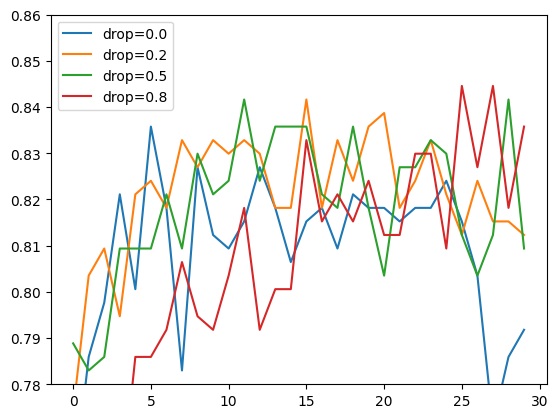

In [39]:
for droprate, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('drop=%s' % droprate))

plt.ylim(0.78, 0.86)
plt.legend()

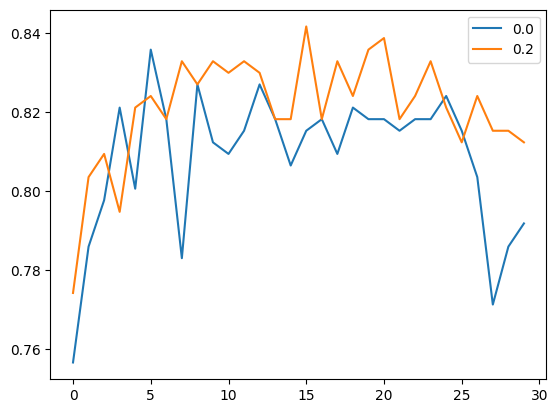

In [40]:
hist = scores[0.0]
plt.plot(hist['val_accuracy'], label=0.0)

hist = scores[0.2]
plt.plot(hist['val_accuracy'], label=0.2)

plt.legend()
#plt.plot(hist['accuracy'], label=('val=%s' % droprate))

## Data augmentation

Data augmentation solo va en los datos de entrenamiento

In [41]:
# train_gen = ImageDataGenerator(
#     preprocessing_function=preprocess_input,
#     rotation_range=30,
#     width_shift_range=10,
#     height_shift_range=10,
#     shear_range=10,
#     zoom_range=0.1,
#     cval=0.0,
#     horizontal_flip=False,
#     vertical_flip=True,
# )

train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=10,
    zoom_range=0.1,
    vertical_flip=True,
)

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
    target_size=(150, 150),
    batch_size=32
)

val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(150, 150),
    batch_size=32,
    shuffle=False
)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [42]:
learning_rate = 0.001
size = 100
droprate = 0.2

model = make_model(
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)

history = model.fit(train_ds, epochs=50, validation_data=val_ds)

Epoch 1/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 35s 298ms/step - accuracy: 0.4676 - loss: 1.5713 - val_accuracy: 0.7331 - val_loss: 0.7904
Epoch 2/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 22s 234ms/step - accuracy: 0.6933 - loss: 0.9208 - val_accuracy: 0.7595 - val_loss: 0.7337
Epoch 3/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 22s 233ms/step - accuracy: 0.7291 - loss: 0.8073 - val_accuracy: 0.7683 - val_loss: 0.6923
Epoch 4/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 22s 230ms/step - accuracy: 0.7709 - loss: 0.6634 - val_accuracy: 0.7830 - val_loss: 0.6194
Epoch 5/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 22s 228ms/step - accuracy: 0.7909 - loss: 0.6408 - val_accuracy: 0.7859 - val_loss: 0.6278
Epoch 6/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 23s 243ms/step - accuracy: 0.7785 - loss: 0.6430 - val_accuracy: 0.7859 - val_loss: 0.6320
Epoch 7/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 23s 241ms/step - accuracy: 0.8114 - loss: 0.5656 - val_accuracy: 0.7801 - val_loss: 0.6455
Epoch 8/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 22s 231ms/step - accuracy: 0.8191 - loss: 0.5153 - val_accu

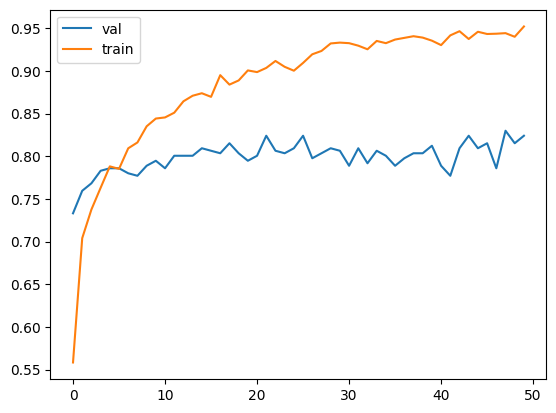

In [43]:
hist = history.history
plt.plot(hist['val_accuracy'], label='val')
plt.plot(hist['accuracy'], label='train')

plt.legend()

## Train 299x299 model

In [44]:
def make_model(input_size=150, learning_rate=0.01, size_inner=100,
               droprate=0.5):

    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(input_size, input_size, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(input_size, input_size, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)

    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)

    outputs = keras.layers.Dense(10)(drop)

    model = keras.Model(inputs, outputs)

    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )

    return model

In [45]:
input_size = 299

In [46]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=10,
    zoom_range=0.1,
    horizontal_flip=True
)

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
    target_size=(input_size, input_size),
    batch_size=32
)


val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(input_size, input_size),
    batch_size=32,
    shuffle=False
)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [47]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v4_1_{epoch:02d}_{val_accuracy:.3f}.keras',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [48]:
learning_rate = 0.0005
size = 100
droprate = 0.2

model = make_model(
    input_size=input_size,
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)

history = model.fit(train_ds, epochs=50, validation_data=val_ds,
                   callbacks=[checkpoint])

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 117s 1s/step - accuracy: 0.5576 - loss: 1.3929 - val_accuracy: 0.8006 - val_loss: 0.6041
Epoch 2/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 80s 833ms/step - accuracy: 0.8154 - loss: 0.5667 - val_accuracy: 0.8240 - val_loss: 0.4678
Epoch 3/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 80s 836ms/step - accuracy: 0.8506 - loss: 0.4678 - val_accuracy: 0.8827 - val_loss: 0.3915
Epoch 4/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 78s 809ms/step - accuracy: 0.8649 - loss: 0.3935 - val_accuracy: 0.8651 - val_loss: 0.3962
Epoch 5/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 76s 788ms/step - accuracy: 0.8770 - loss: 0.3548 - val_accuracy: 0.8651 - val_loss: 0.3795
Epoch 6/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 76s 794ms/step - accuracy: 0.8828 - loss: 0.3268 - val_accuracy: 0.8534 - val_loss: 0.4024
Epoch 7/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 75s 786ms/step - accuracy: 0.9005 - loss: 0.2937 - val_accuracy: 0.8563 - val_loss: 0.3798
Epoch 8/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 79s 827ms/step - accuracy: 0.9067 - loss: 0.2674 - val_accura

## Using the model

### Loading the model

In [49]:
test_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_ds = test_gen.flow_from_directory(
    './clothing-dataset-small/test',
    target_size=(299, 299),
    batch_size=32,
    shuffle=False
)

Found 372 images belonging to 10 classes.


### Evaluating the model

In [50]:
model.evaluate(test_ds)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


12/12 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.8634 - loss: 0.3648


[0.28533780574798584, 0.9032257795333862]

### Getting predictions

In [54]:
import numpy as np

path = 'clothing-dataset-small/test/pants/c8d21106-bbdb-4e8d-83e4-bf3d14e54c16.jpg'
img = load_img(path, target_size=(299, 299))

x = np.array(img)
x = np.array([x])
x.shape

x = preprocess_input(x)
pred = model.predict(x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


In [55]:
classes = [
    'dress',
    'hat',
    'longsleeve',
    'outwear',
    'pants',
    'shirt',
    'shoes',
    'shorts',
    'skirt',
    't-shirt'
]

dict(zip(classes, pred[0]))

{'dress': -7.660372,
 'hat': -6.905099,
 'longsleeve': -3.972549,
 'outwear': -5.123703,
 'pants': 11.092458,
 'shirt': -6.5876503,
 'shoes': -10.567772,
 'shorts': 3.3035727,
 'skirt': -11.173324,
 't-shirt': -8.02938}

## Que sigue?
- Lo siguiente es **serverless** con aws lambda, https://github.com/DataTalksClub/machine-learning-zoomcamp/tree/master/09-serverless, pero no lo tengo.
- Luego **kubernetes**, https://github.com/DataTalksClub/machine-learning-zoomcamp/tree/master/10-kubernetes.
- De manera opcional **kserve,** https://github.com/DataTalksClub/machine-learning-zoomcamp/tree/master/11-kserve